In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from ising_kitaev import initialize_chain, run_adiabatic_zeeman_change, rotate_to_measurement_basis, add_measurement
from ising_kitaev import move_chain

In [2]:
zeeman_ferro = 0.01  # value of on-site magnetic field for ferromagnetic domain
zeeman_para = 10  # value of on-site magnetic field for paramagnetic domain
initial_config = np.array([zeeman_ferro, zeeman_ferro, zeeman_ferro, zeeman_para, zeeman_para, zeeman_para])
final_config = np.array([zeeman_para, zeeman_para, zeeman_para, zeeman_ferro, zeeman_ferro, zeeman_ferro])
qreg = QuantumRegister(6)
creg = ClassicalRegister(3)
qcirc = QuantumCircuit(qreg, creg)

from qiskit import Aer, execute

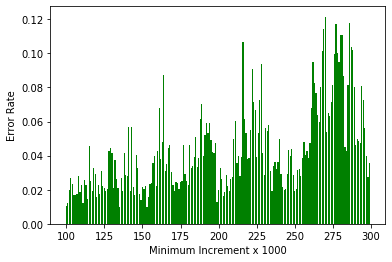

In [3]:
dict = {}
for i in range(100,300):
    qreg = QuantumRegister(6)
    creg = ClassicalRegister(3)
    qcirc = QuantumCircuit(qreg, creg)
    initialize_chain(qcirc, qreg, initial_config, 'logical_zero')
    # moving ferromagenetic domain to one end
    move_chain(qcirc, qreg, initial_config, final_config, 0, 0.25,0.001 * i, 2, 10, method = "both")
    # moving back the ferromagnetic domain
    rotate_to_measurement_basis(qcirc, qreg, [3, 4, 5]) # measurement in logical basis
    add_measurement(qcirc, qreg, creg, [3, 4, 5])
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qcirc, backend, shots=2000)
    result = job.result()
    result.get_counts()
    r = round(1 - result.get_counts().get('000', "")/2000, 4)
    dict[i] = r  
      
plt.xlabel('Minimum Increment x 1000', fontsize= 10)
plt.ylabel('Error Rate', fontsize= 10)
plt.bar(list(dict.keys()),dict.values(), color = 'g')
plt.show()

These are the definitions for the gap fraction and minimum increment variables. With each intermediate zeeman configuration, a gap value is estimated. The zeeman field is then updated by this value multiplied by the gap fraction. The minimum increment value is the minimum value to update the Zeeman field by, in case the update value is too small. 


Error rate is plotted on the Y-axis and the minimum increment value * 1000 is plotted on the X-axis. Error is relatively low for minimum increment values of 0.1 to 0.3. 